In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
df = pd.read_excel('C:\\Users\\anny_\\Documents\\The_Glassdoor_Project\\Output\\glassdoor_jobs.xlsx', engine='openpyxl')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,med_salary,State,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,53,91,72.0,NM,47,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,63,112,87.5,MD,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,80,90,85.0,FL,10,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,56,97,76.5,WA,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,86,143,114.5,NY,22,1,0,0,0,1


In [52]:
def simplify_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'    

df['Job_Simplif'] = df['Job Title'].apply(simplify_title) # Job Title

df['Seniority'] = df['Job Title'].apply(seniority) # Seniority

df['description_len'] = df['Job Description'].apply(lambda x: len(x)) # Job description len

df['num_competitors'] = df['Competitors'].astype(str).apply(lambda x: len(x.split(',') if x != '-1' else '0')) # Count competitors

# Hour to anual wage
df['min_salary'] = df.apply(lambda x: x.min_salary * 2 if x['Per Hour'] == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary * 2 if x['Per Hour'] == 1 else x.max_salary, axis=1)
df[df['Per Hour']==1][['Per Hour', 'min_salary', 'max_salary']]

df['Company Name'] = df['Company Name'].apply(lambda x: x.replace('\n', '')) # Remove new line Job Title

df['State'] = df['State'].apply(lambda x: x.replace('Los Angeles', 'LA')) 

<AxesSubplot:>

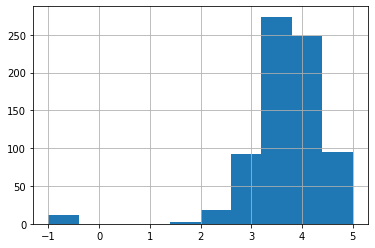

In [53]:
df.Rating.hist()

<AxesSubplot:>

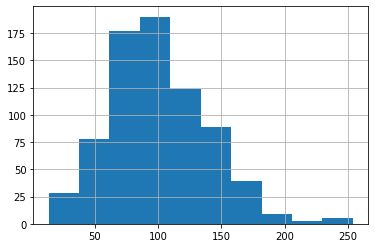

In [54]:
df.med_salary.hist()

<AxesSubplot:>

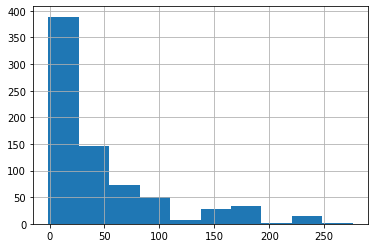

In [55]:
df.age.hist()

<AxesSubplot:>

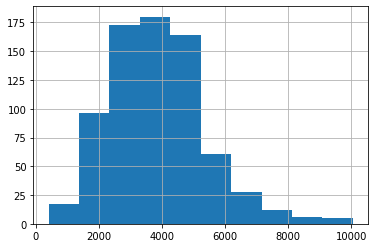

In [56]:
df.description_len.hist()

<AxesSubplot:>

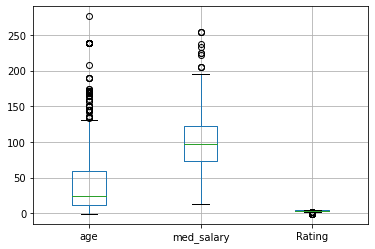

In [57]:
df.boxplot(column = ['age', 'med_salary', 'Rating'])

<AxesSubplot:>

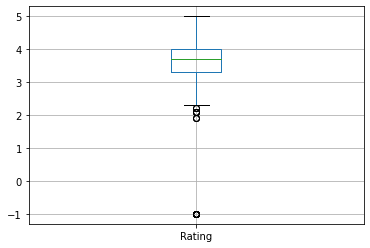

In [58]:
df.boxplot(column = 'Rating')

In [59]:
df[['age', 'med_salary', 'Rating', 'description_len']].corr() # Correlations

,age,med_salary,Rating,description_len
age,1.000000,0.019655,0.021655,0.163911
med_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
description_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

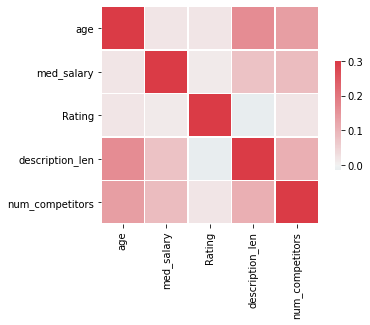

In [60]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age', 'med_salary', 'Rating', 'description_len', 'num_competitors']].corr(), vmax=.3, center=0, cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink':.5})

Graph for Location: total = 200


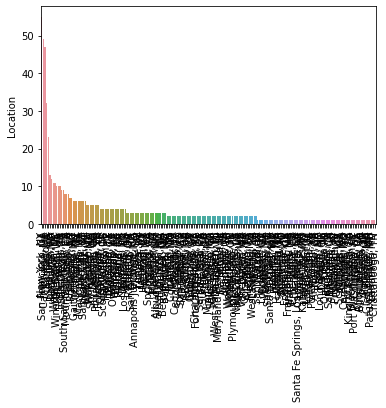

Graph for Headquarters: total = 198


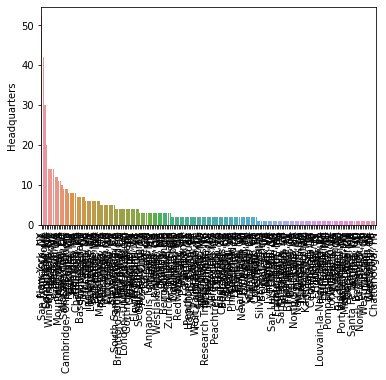

Graph for Size: total = 9


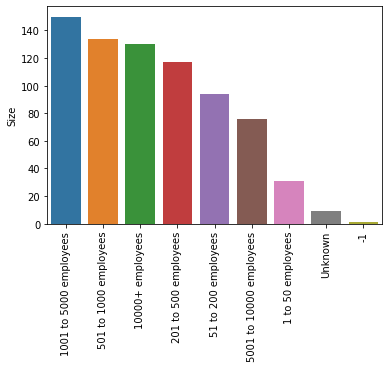

Graph for Type of ownership: total = 11


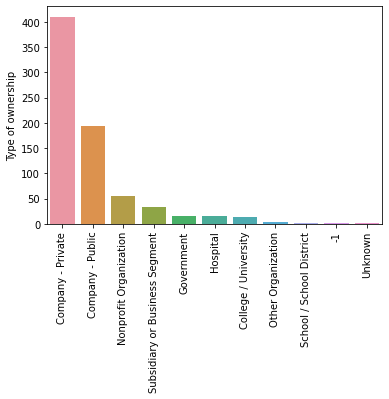

Graph for Industry: total = 60


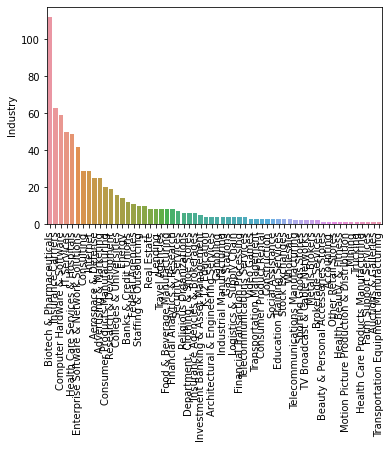

Graph for Sector: total = 25


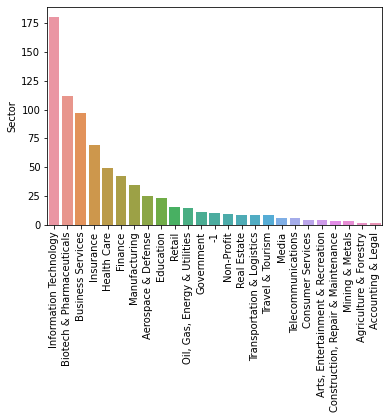

Graph for Revenue: total = 14


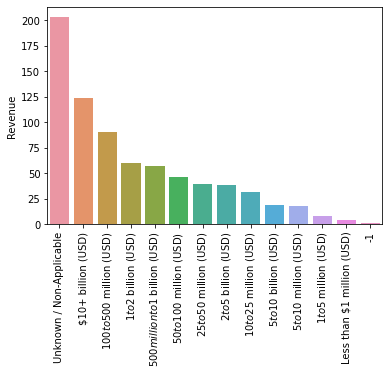

Graph for Company Name: total = 343


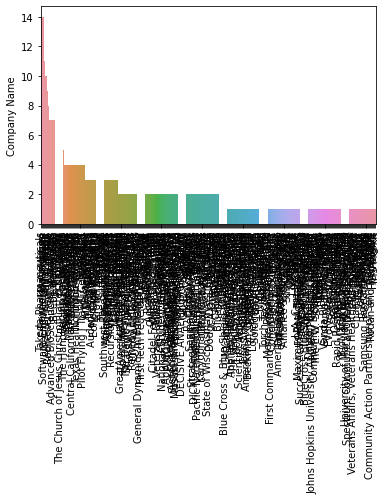

Graph for State: total = 37


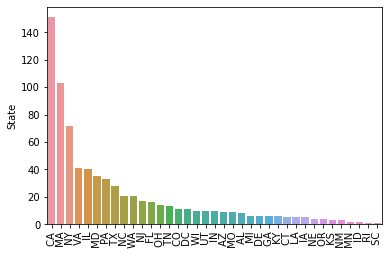

Graph for spark: total = 2


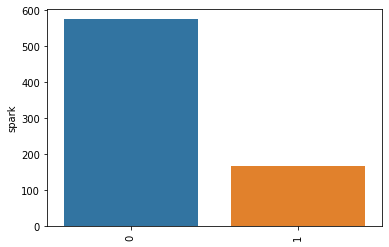

Graph for aws: total = 2


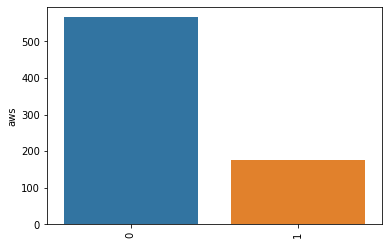

Graph for excel: total = 2


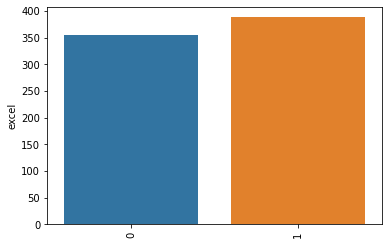

Graph for Job_Simplif: total = 7


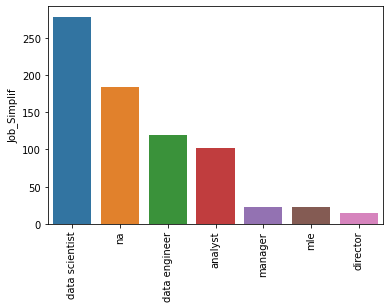

Graph for Seniority: total = 3


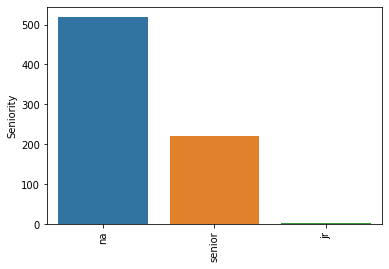

In [61]:
df_cat = df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Company Name', 
             'State', 'spark', 'aws', 'excel','Job_Simplif', 'Seniority']]

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


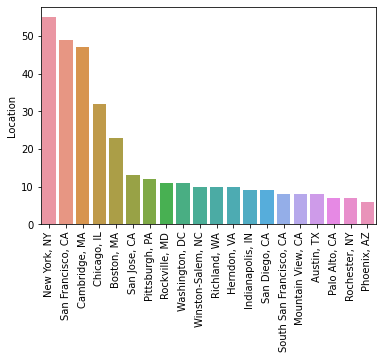

Graph for Headquarters: total = 20


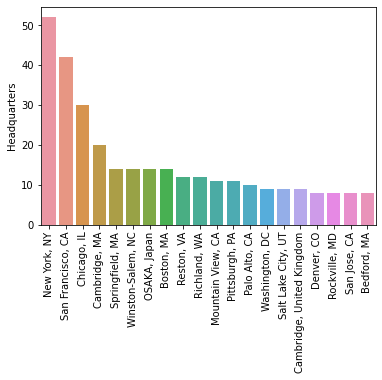

Graph for Company Name: total = 20


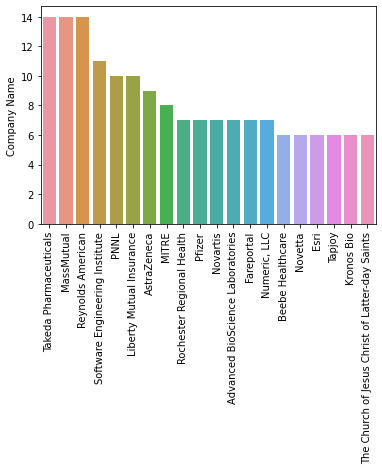

In [62]:
for i in df_cat[['Location', 'Headquarters', 'Company Name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [64]:
pd.pivot_table(df, index='Job_Simplif', values='med_salary')

,med_salary
Job_Simplif,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [65]:
pd.pivot_table(df, index=['Job_Simplif','Seniority'], values='med_salary')

med_salary
Job_Simplif    Seniority            
analyst        jr          53.250000
               na          61.308219
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [77]:
pd.pivot_table(df, index=['State','Job_Simplif'], values='med_salary', aggfunc='count').sort_values('State', ascending=False)

med_salary
State Job_Simplif               
 WI   na                       4
      data scientist           3
      analyst                  3
 WA   na                       1
      data scientist          17
      analyst                  3
 VA   na                       5
      mle                      2
      data scientist          18
      data engineer           10
      analyst                  6
 UT   data engineer            3
      analyst                  4
      data scientist           3
 TX   na                       7
      data scientist          13
      data engineer            8
 TN   data scientist           1
      data engineer           10
      analyst                  2
 SC   na                       1
 RI   analyst                  1
 PA   manager                  3
      data engineer            1
      data scientist           6
      analyst                  8
      mle                      7
      na                       8
 OR   data scientist           3
      data engineer            1
 OH   na                       3
      data scientist           7
      analyst                  4
 NY   na                      12
      mle                      2
      data scientist          40
      data engineer            4
      analyst                 14
 NM   data scientist           3
 NJ   data scientist           4
      analyst                  6
      data engineer            2
      manager                  2
      director                 2
      na                       1
 NE   na                       4
 NC   na                      12
      data scientist           3
      data engineer            6
 MO   na                       3
      manager                  1
      data scientist           3
      analyst                  2
 MN   data engineer            1
      analyst                  1
 MI   data scientist           4
      manager                  2
 MD   na                      16
      data engineer            3
      analyst                  3
      data scientist          13
 MA   na                      46
      manager                  5
      director                 6
      data scientist          30
      data engineer           12
      analyst                  4
 LA   analyst                  1
      data scientist           1
      data engineer            2
      na                       1
 KY   na                       4
      data scientist           2
 KS   mle                      3
 IN   na                       4
      data scientist           2
      data engineer            4
 IL   analyst                  3
      na                       6
      mle                      2
      director                 6
      data scientist          15
      data engineer            8
 ID   analyst                  2
 IA   analyst                  2
      data engineer            3
 GA   data scientist           3
      na                       3
 FL   data scientist           7
      data engineer            3
      analyst                  6
 DE   na                       6
 DC   data scientist           5
      data engineer            4
      analyst                  2
 CT   na                       3
      data scientist           2
 CO   mle                      1
      data engineer            3
      analyst                  1
      na                       3
      data scientist           3
 CA   na                      27
      mle                      5
      manager                  9
      data scientist          67
      data engineer           25
      analyst                 18
 AZ   data scientist           1
      data engineer            5
      analyst                  1
      na                       2
 AL   na                       2
      data engineer            1
      analyst                  5

In [78]:
pd.pivot_table(df[df['Job_Simplif']=='data scientist'], index='State', values='med_salary').sort_values('med_salary', ascending=False)

,med_salary
State,
DC,149.000000
CA,143.044776
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [79]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Per Hour', 'Employer_Provided', 'min_salary', 'max_salary',
       'med_salary', 'State', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'Job_Simplif', 'Seniority', 'description_len',
       'num_competitors'],
      dtype='object')

In [88]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Per Hour', 'Employer_Provided', 'python_yn', 'R_yn', 'spark', 
'aws', 'excel', 'Type of ownership', 'med_salary']]

In [93]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values='med_salary').sort_values('med_salary', ascending=False))

Rating
        med_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          med_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'med_salary' not 1-dimensional

In [94]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='med_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


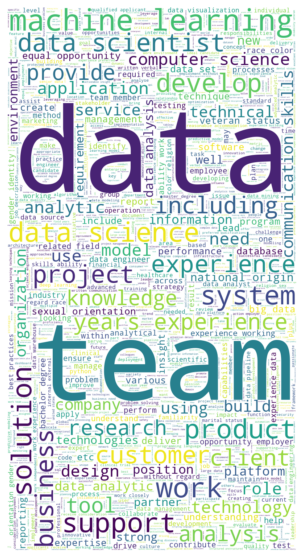

In [111]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()